In [37]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [38]:
import pandas as pd

df_raw = pd.read_csv("E-Commerce Data.csv", encoding='ISO-8859-1')


In [39]:
print(f"Rows: {df_raw.shape[0]}, Columns: {df_raw.shape[1]}")

Rows: 541909, Columns: 8


In [40]:
df_cleaned = df_raw.copy()

In [41]:
df_cleaned.isnull().values.any()
#true means there are missing values in the sheet

True

In [42]:
missing_row_count = df_cleaned.isnull().any(axis=1).sum()
print(f"Rows with missing values: {missing_row_count}")

Rows with missing values: 135080


In [43]:
df_cleaned.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [44]:
df_missing_rows = df_cleaned[df_cleaned.isnull().any(axis=1)]
df_missing_rows.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [45]:
count_question_mark = df_cleaned['Description'].str.contains('\?', na=False).sum()
print(f"Number of rows with '?' in the Description: {count_question_mark}")

Number of rows with '?' in the Description: 82


will keep rows with blank customer ID because they provide other useful info but will filter them from customer KPIs

## Remove fully duplicate rows

In [46]:
duplicates = df_cleaned[df_cleaned.duplicated(keep=False)]
print(f"Exact duplicate rows: {len(duplicates)}")

Exact duplicate rows: 10147


In [47]:
duplicates = duplicates.sort_values(by=list(df_cleaned.columns))
duplicates.head(4)  # Show example of 2 duplicate pairs

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom


In [48]:
df_cleaned = df_cleaned.drop_duplicates(keep='first')
print(f"Remaining duplicates: {df_cleaned.duplicated().sum()}")
# Removing extra duplicated rows but keeping the first occurrence of each

Remaining duplicates: 0


## Remove rows with canceled invoices


In [49]:
# Show only canceled invoices (those starting with 'C')
df_canceled = df_raw[df_raw['InvoiceNo'].astype(str).str.startswith('C')]

# Preview the first few rows
df_canceled.head()
#quantity is negative presumably because these items are being returned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [50]:
cancelled_count = df_raw['InvoiceNo'].astype(str).str.startswith('C').sum()

print(f"Number of canceled orders in raw file: {cancelled_count}")

Number of canceled orders in raw file: 9288


In [51]:
# Remove canceled orders
df_cleaned = df_raw[~df_raw['InvoiceNo'].astype(str).str.startswith('C')]

cancelled_count = df_cleaned['InvoiceNo'].astype(str).str.startswith('C').sum()
print(f"Number of canceled orders in cleaned file: {cancelled_count}")

Number of canceled orders in cleaned file: 0


## Remove rows with quantity zero or smaller

In [52]:
df_cleaned[df_cleaned['Quantity'] <= 0]
#1336 rows were found

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


In [53]:
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]
print(f"Number of rows with Quantity less than or equal to zero left: {df_cleaned[df_cleaned['Quantity'] <= 0].shape[0]}")

Number of rows with Quantity less than or equal to zero left: 0


## Remove rows with unit price zero or smaller

In [54]:
df_cleaned[df_cleaned['UnitPrice'] <= 0]
#2512 rows with unit price = 0 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535334,581211,22142,check,14,12/7/2011 18:36,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom


In [55]:
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]
print(f"Number of rows with UnitPrice less than or equal to zero left: {df_cleaned[df_cleaned['UnitPrice'] <= 0].shape[0]}")


Number of rows with UnitPrice less than or equal to zero left: 0


In [56]:
count_question_mark = df_cleaned['Description'].str.contains('\?', na=False).sum()
print(f"Number of rows with '?' in the Description: {count_question_mark}")


Number of rows with '?' in the Description: 0


# Analysis

In [65]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned[['Quantity', 'UnitPrice', 'TotalPrice']].head()


,Quantity,UnitPrice,TotalPrice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [66]:
zero_total = df_cleaned[df_cleaned['TotalPrice'] == 0]
print(f"Number of rows with TotalPrice = 0: {zero_total.shape[0]}")


Number of rows with TotalPrice = 0: 0


In [67]:
total_revenue = df_cleaned['TotalPrice'].sum()
print(f"💰 Total Revenue: £{total_revenue:,.2f}")

💰 Total Revenue: £10,666,684.54


In [68]:
num_orders = df_cleaned['InvoiceNo'].nunique()
print(f"🧾 Number of Orders: {num_orders}")


🧾 Number of Orders: 19960


In [69]:
aov = total_revenue / num_orders
print(f"📦 Average Order Value: £{aov:,.2f}")

📦 Average Order Value: £534.40


In [70]:
total_quantity = df_cleaned['Quantity'].sum()
print(f"📊 Total Quantity Sold: {total_quantity}")


📊 Total Quantity Sold: 5588376


In [71]:
top_countries = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)
print("🌍 Top 5 Countries by Revenue:")
print(top_countries)


🌍 Top 5 Countries by Revenue:
Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: TotalPrice, dtype: float64


In [72]:
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
print("🏆 Top 5 Products by Units Sold:")
print(top_products)

🏆 Top 5 Products by Units Sold:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
Name: Quantity, dtype: int64


In [73]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce')
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')
monthly_revenue = df_cleaned.groupby('YearMonth')['TotalPrice'].sum().reset_index()
monthly_revenue.columns = ['Month', 'Revenue']

print(monthly_revenue.head())

     Month     Revenue
0  2010-12  823746.140
1  2011-01  691364.560
2  2011-02  523631.890
3  2011-03  717639.360
4  2011-04  537808.621


In [74]:
country_month_revenue = df_cleaned.groupby(['YearMonth', 'Country'])['TotalPrice'].sum().reset_index()
country_month_revenue.columns = ['Month', 'Country', 'Revenue']

print(country_month_revenue.head())

     Month          Country  Revenue
0  2010-12        Australia  1032.85
1  2010-12          Austria   277.20
2  2010-12          Bahrain   205.74
3  2010-12          Belgium  1809.91
4  2010-12  Channel Islands   363.53


In [75]:
pivot_country_month = country_month_revenue.pivot(index='Month', columns='Country', values='Revenue').fillna(0)
pivot_country_month.head()


Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
Month,,,,,,,,,,,,,,,,,,,,,
2010-12,1032.85,277.20,205.74,1809.91,0.0,0.00,363.53,1590.82,0.00,1281.50,...,0.0,0.00,0.00,1843.73,3834.30,1304.92,0.00,0.00,748268.980,0.0
2011-01,9017.71,0.00,0.00,1200.20,0.0,0.00,675.58,547.50,0.00,0.00,...,0.0,0.00,2053.07,10086.09,3486.32,4231.23,0.00,0.00,561289.980,0.0
2011-02,14695.42,518.36,0.00,2181.07,0.0,0.00,1784.71,4334.24,549.26,399.22,...,0.0,145.92,0.00,2114.50,509.50,2654.92,0.00,889.24,430027.950,0.0
2011-03,17223.99,1708.12,0.00,3351.98,0.0,140.54,3509.33,938.39,0.00,3978.99,...,0.0,0.00,0.00,5363.15,4720.58,1870.23,0.00,0.00,586230.280,0.0
2011-04,771.60,680.78,0.00,1989.48,1143.6,0.00,293.00,0.00,0.00,0.00,...,0.0,0.00,8209.58,1785.65,809.10,2076.94,383.95,0.00,476517.761,299.1


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
print(monthly_revenue.dtypes)
print(monthly_revenue.head())

Month       object
Revenue    float64
dtype: object
     Month     Revenue
0  2010-12  823746.140
1  2011-01  691364.560
2  2011-02  523631.890
3  2011-03  717639.360
4  2011-04  537808.621


In [87]:
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

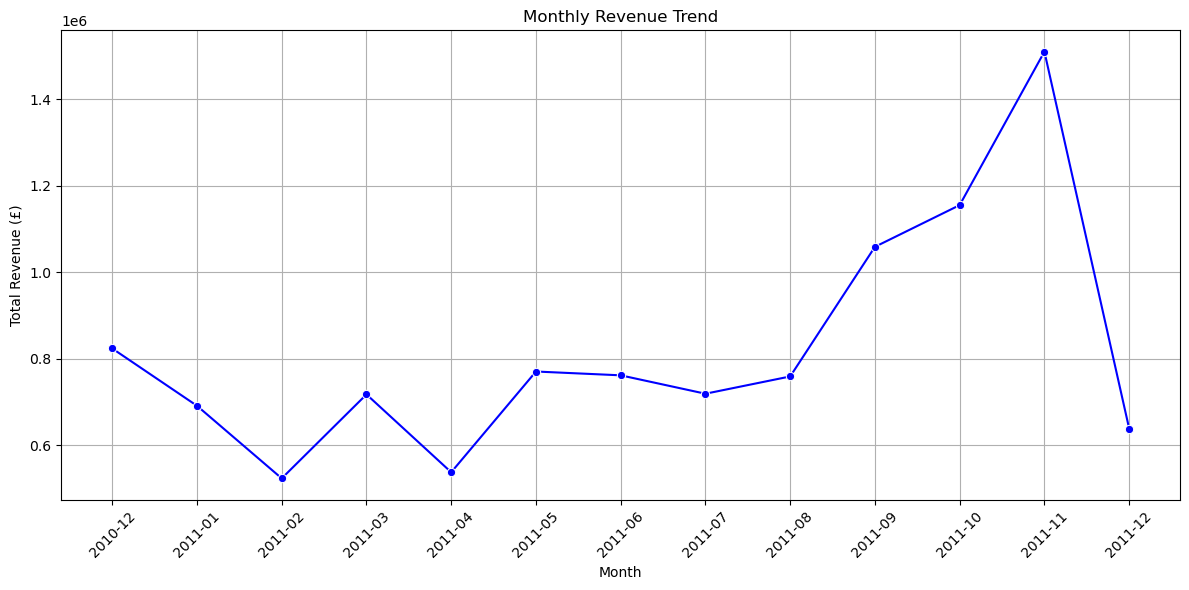

In [88]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o', color='blue')

plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


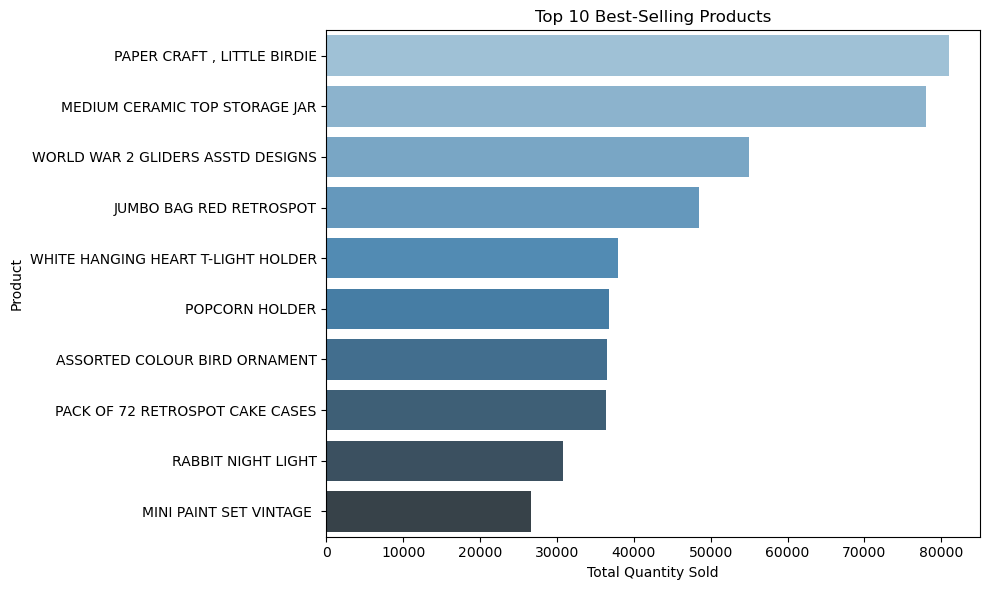

In [89]:
# Group by Description and sum Quantity
top_products = df_cleaned.groupby('Description')['Quantity'].sum().reset_index()

# Sort by Quantity in descending order
top_products = top_products.sort_values(by='Quantity', ascending=False)
top_10_products = top_products.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_products, x='Quantity', y='Description', palette='Blues_d')

plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

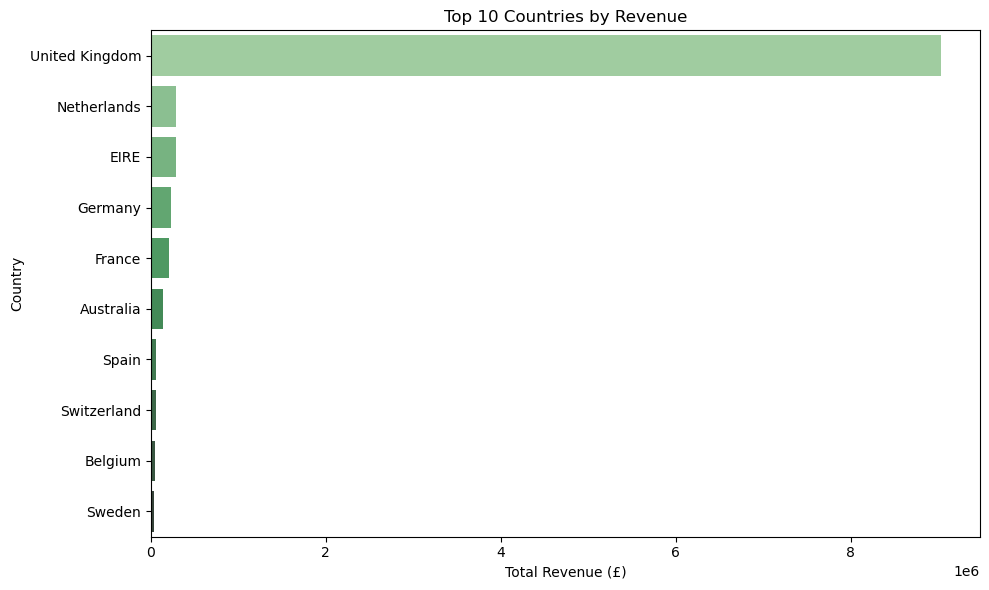

In [90]:
# Group by Country and sum TotalPrice
revenue_by_country = df_cleaned.groupby('Country')['TotalPrice'].sum().reset_index()

# Sort in descending order
revenue_by_country = revenue_by_country.sort_values(by='TotalPrice', ascending=False)

top_10_countries = revenue_by_country.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_countries, x='TotalPrice', y='Country', palette='Greens_d')

plt.title('Top 10 Countries by Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [91]:
with pd.ExcelWriter("Ecommerce_Cleaned.xlsx", engine='openpyxl') as writer:
    df_raw.to_excel(writer, sheet_name="Raw_Data", index=False)
    df_cleaned.to_excel(writer, sheet_name="Cleaned_Data", index=False)